In [1]:
import tweepy
import json

In [2]:
def get_credentials(file: dict):
    """Reads credential from json file
    :param file: JSON file with CONSUMER and ACCESS TOKE and SECRET values
    :return: dict
    """
    with open(file, "r") as file:
        result = json.load(file)
        return result

creds = get_credentials(file="../auth/twitter_credentials.json")

In [3]:
api_v2 = tweepy.Client(
    bearer_token=creds["BEARER_TOKEN"],
    consumer_key=creds["CONSUMER_KEY"],
    consumer_secret=creds["CONSUMER_SECRET"],
    access_token=creds["ACCESS_TOKEN"],
    access_token_secret=creds["ACCESS_SECRET"],
    wait_on_rate_limit=True,
)

In [5]:
test_user = api_v2.get_user(username="cdibona").data
test_user

<User id=44423 name=Chris DiBona username=cdibona>

In [54]:
auth = tweepy.OAuthHandler(
    creds["CONSUMER_KEY"],
    creds["CONSUMER_SECRET"]
)
auth.set_access_token(
    creds["ACCESS_TOKEN"],
    creds["ACCESS_SECRET"],
)

api_v1 = tweepy.API(
    auth, 
    wait_on_rate_limit=True, 
)

In [55]:
test_user = api_v1.get_user(screen_name="cdibona")
test_user.id

44423

In [69]:
import time 

def get_user_followers(
        user_id: str,
        max_results: int = 50,
        max_items: int = 50,
):
    followers = []
    counter = 0
    for follower in tweepy.Paginator(
            api_v2.get_users_followers,
            id=user_id,
            max_results=max_results).flatten(limit=max_items):
        followers.append(follower)
        n_followers = len(followers)
        if (n_followers % 100 == 0):
            print(f"Waiting 1 second. We have collected: {n_followers} followers")
            time.sleep(1)

    print("Finished!")
    return followers


def get_user_followers_v1(
        user_id: str,
        max_items: int = 50,
):
    user_list = [user_id]
    follower_list = []
    for user in user_list:
        followers = []
        try:
            for page in tweepy.Cursor(api.get_follower_ids, user_id=user).items(max_items):
                followers += [page]
        except tweepy.TweepyException:
            print("error")
            continue
        follower_list.append(followers)

    print("Finished!")
    return followers

In [70]:
followers = get_user_followers_v1(test_user.id, max_items=25)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Finished!


In [58]:
# followers = get_user_followers(user_id=test_user.id, max_items=25, max_results=25)

In [71]:
followers

[1486443947673092096,
 872205655,
 327460481,
 1489317307252101120,
 1398004682002354177,
 30818840,
 302239232,
 1444945173893599232,
 775705893665136640,
 1475128230323572738,
 1489088622989086725,
 1488828217024786434,
 1488006817833795585,
 881416073576370176,
 1076140318607720448,
 4266804923,
 1266686725792976901,
 1486938831802839041,
 226271242,
 1154170566468919296,
 169400185,
 1450771608562540545,
 1312429268773855234,
 1488529138751266817,
 1488494957828907012]

In [72]:
# followers_list = [f.id for f in followers]
followers_list = followers

In [73]:
import pandas as pd

# Empty DataFrame
df = pd.DataFrame(columns=['source','target']) 

# Set the list of followers as the target column
df['target'] = followers_list
df['source'] = test_user.id

In [74]:
import networkx as nx

# Turns DataFrame into a Graph:
graph = nx.from_pandas_edgelist(df, 'source', 'target') 

# Gets the layout:
pos = nx.spring_layout(graph) 

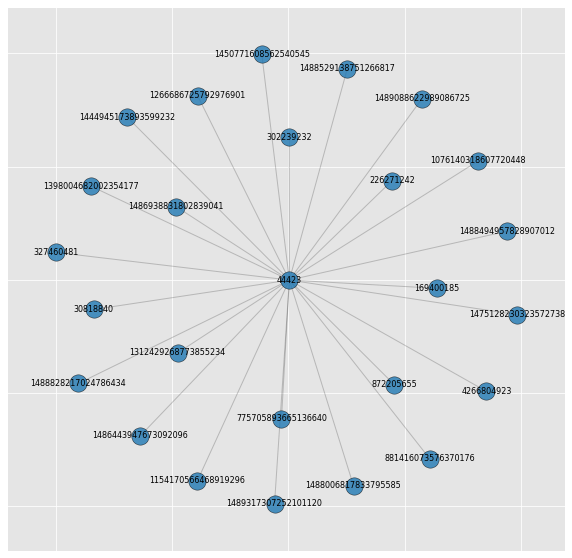

In [75]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

nodes = nx.draw_networkx_nodes(graph, pos, alpha=0.8)
nodes.set_edgecolor('k')

nx.draw_networkx_labels(graph, pos, font_size=8)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.2)

In [76]:
for f_id in followers_list:
    print(f"Getting followers of: {f_id}...")
    # f_followers = get_user_followers(user_id=f_id, max_results=50)
    f_followers = get_user_followers_v1(user_id=f_id, max_items=50)
    f_df = pd.DataFrame(columns=['source', 'target'])
    # f_df['target'] = [int(ff_id.id) for ff_id in f_followers]
    f_df['target'] = f_followers
    f_df['source'] = int(f_id)
    df = pd.concat([df, f_df])
    print(f_df.shape)
    print(df.shape)

Getting followers of: 1486443947673092096...
1
2
3
Finished!
(3, 2)
(28, 2)
Getting followers of: 872205655...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Finished!
(50, 2)
(78, 2)
Getting followers of: 327460481...
1
2
3
4
5
6
7
Finished!
(7, 2)
(85, 2)
Getting followers of: 1489317307252101120...
1
Finished!
(1, 2)
(86, 2)
Getting followers of: 1398004682002354177...
1
2
3
Finished!
(3, 2)
(89, 2)
Getting followers of: 30818840...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
Finished!
(28, 2)
(117, 2)
Getting followers of: 302239232...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Finished!
(50, 2)
(167, 2)
Getting followers of: 1444945173893599232...
Finished!
(0, 2)
(167, 2)
Getting followers of: 775705893665136640...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1

Rate limit reached. Sleeping for: 790


KeyboardInterrupt: 

In [77]:
df["source"] = df["source"].astype(int)
df["target"] = df["target"].astype(int)
df

,source,target
0,44423,1486443947673092096
1,44423,872205655
2,44423,327460481
3,44423,1489317307252101120
4,44423,1398004682002354176
...,...,...
17,775705893665136640,817434146431758336
18,775705893665136640,778850445787746304
19,775705893665136640,562239534
0,1489088622989086725,1381605628460871680


In [ ]:
# df.to_csv(f"network_of_followers_for_{test_user.id}.csv")

In [78]:
graph = nx.from_pandas_edgelist(df, 'source', 'target')

In [79]:
graph.number_of_nodes()

192

In [80]:
g_sorted = pd.DataFrame(
    sorted(graph.degree,
           key=lambda x: x[1],
           reverse=True)
)

g_sorted.columns = ["nconst","degree"]
g_sorted.head(20)

,nconst,degree
0,872205655,51
1,302239232,51
2,30818840,29
3,44423,25
4,775705893665136640,21
5,327460481,8
6,1486443947673092096,4
7,1398004682002354177,3
8,1489317307252101120,2
9,1489088622989086725,2


In [ ]:
import pandas as pd
df = pd.DataFrame(columns=["source", "target"])

import numpy as np
df["source"] = np.random.randint(low=1, high=500, size=1000)
df["target"] = np.random.randint(low=500, high=1000, size=1000)

import networkx as nx

# Turns DataFrame into a Graph:
graph = nx.from_pandas_edgelist(df, 'source', 'target') 

# Gets the layout:
pos = nx.spring_layout(graph) 

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

nodes = nx.draw_networkx_nodes(graph, pos, alpha=0.8)
nodes.set_edgecolor('k')

nx.draw_networkx_labels(graph, pos, font_size=8)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.2)

In [81]:
graph.number_of_nodes()

192

In [82]:
g_sorted = pd.DataFrame(sorted(graph.degree, key=lambda x: x[1], reverse=True))
g_sorted.columns = ["nconst","degree"]
g_sorted.head(10)

,nconst,degree
0,872205655,51
1,302239232,51
2,30818840,29
3,44423,25
4,775705893665136640,21
5,327460481,8
6,1486443947673092096,4
7,1398004682002354177,3
8,1489317307252101120,2
9,1489088622989086725,2


In [83]:
# Exclude nodes with degree less than ...
g_tmp = nx.k_core(graph, 1)
# g_tmp.degree

In [84]:
from community import community_louvain
partition = community_louvain.best_partition(g_tmp)

# Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']
partition1

,names,group
0,44423,4
1,1486443947673092096,4
2,872205655,2
3,327460481,3
4,1489317307252101120,4
...,...,...
187,778850445787746304,7
188,562239534,7
189,1489088622989086725,1
190,1381605628460871680,1


In [85]:
g_sorted = pd.DataFrame(sorted(g_tmp.degree, key=lambda x: x[1], reverse=True))
g_sorted.columns = ['names','degree']
g_sorted.head()
dc = g_sorted

In [86]:
combined = pd.merge(
    dc,
    partition1,
    how='left', 
    left_on="names",
    right_on="names"
)

In [87]:
combined

,names,degree,group
0,872205655,51,2
1,302239232,51,6
2,30818840,29,5
3,44423,25,4
4,775705893665136640,21,7
...,...,...,...
187,817434146431758336,1,7
188,778850445787746304,1,7
189,562239534,1,7
190,1381605628460871680,1,1


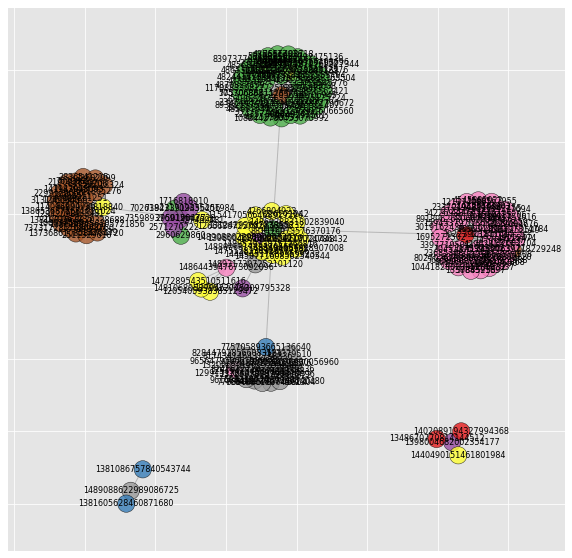

In [88]:
pos = nx.spring_layout(g_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

nodes = nx.draw_networkx_nodes(
    g_tmp, pos,
    cmap=plt.cm.Set1,
    node_color=combined['group'],
    alpha=0.8
)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(g_tmp, pos, font_size=8)
nx.draw_networkx_edges(g_tmp, pos, width=1.0, alpha=0.2)

# plt.savefig('twitterFollowers.png')

In [ ]:
df